<a href="https://colab.research.google.com/github/Thamizhini-K-R/-Supermart-Grocery-Sales--Retail-Analytics-/blob/main/Supermart_Grocery_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [10]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape: (9994, 11)

Columns: Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

Missing values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Data types:
 Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')


In [13]:
print("Null dates after conversion:", df['Order Date'].isnull().sum())


Null dates after conversion: 0


In [14]:
df = df.dropna(subset=['Order Date'])


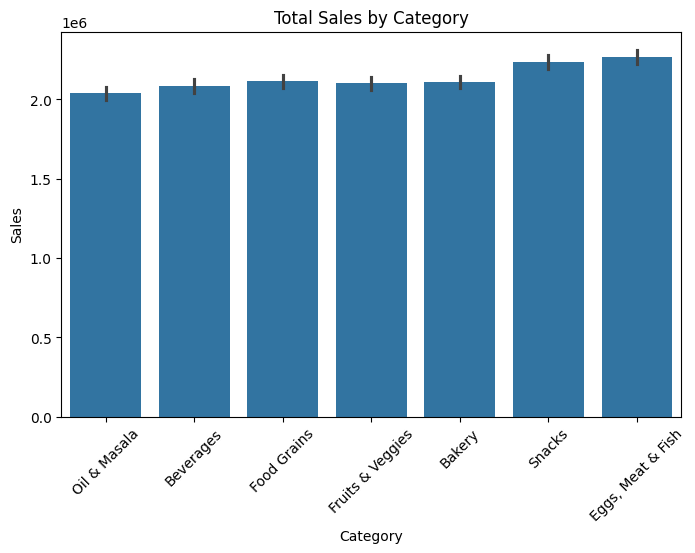

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

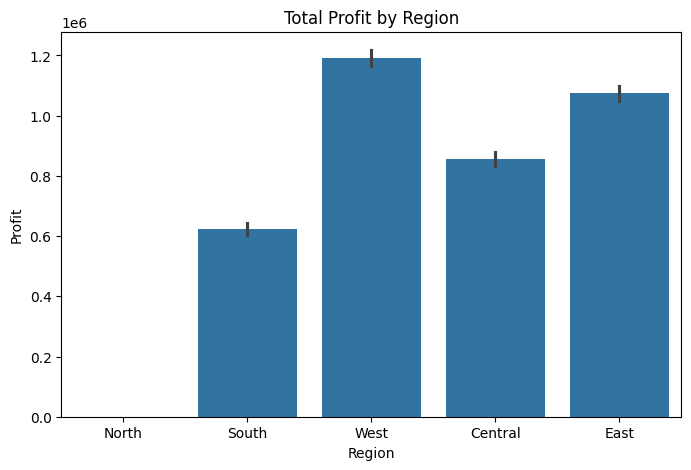

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Region')
plt.show()

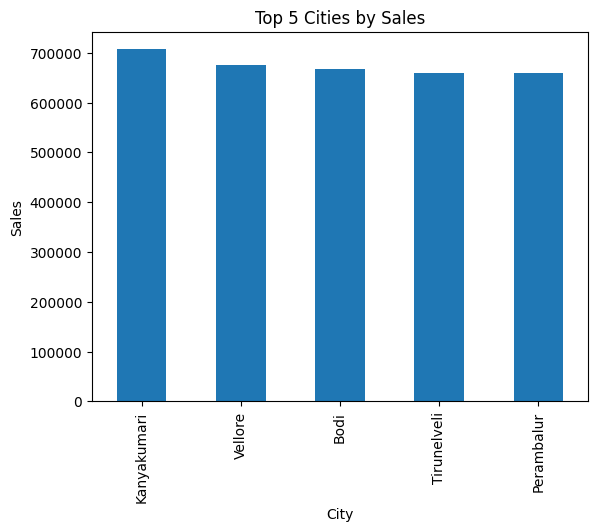

In [17]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', title='Top 5 Cities by Sales', ylabel='Sales', xlabel='City')
plt.show()

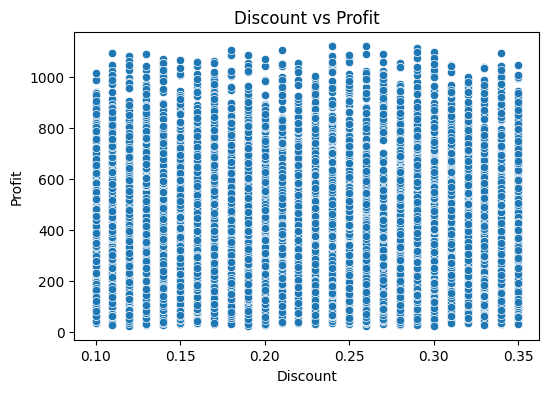

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

In [19]:
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

<ipython-input-19-4165825903>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


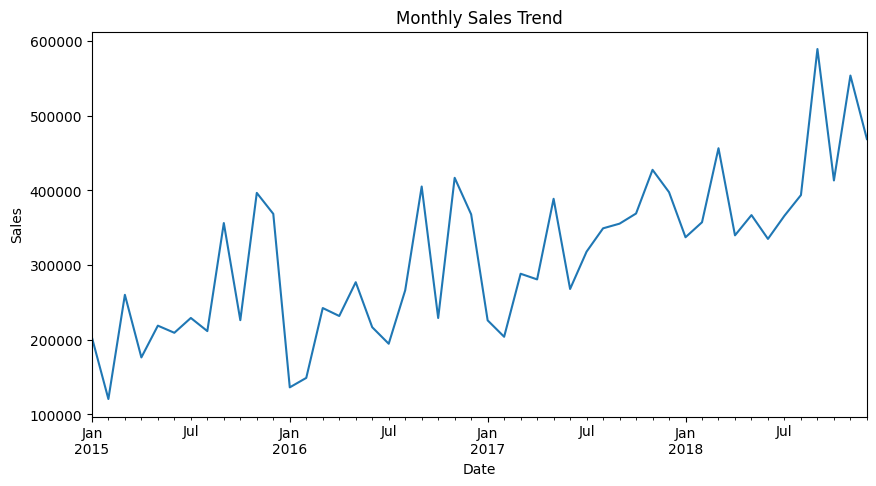

In [20]:
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

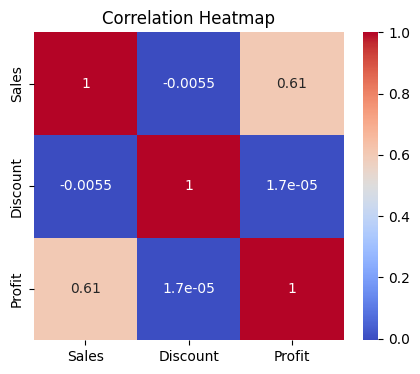

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['Sales', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()